In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
spotify_data_path = 'Spotify_data.csv'
spotify_data = pd.read_csv(spotify_data_path)

In [5]:
# Display the first few rows and summary of the dataset
spotify_data_head = spotify_data.head()
spotify_data_description = spotify_data.describe(include='all')
spotify_data_columns = spotify_data.columns

In [6]:
print(spotify_data_head)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0,0.803,0.6240,7,-6.764,0,0.0477,0.451,0.000734,0.1000,0.6280,95.968,304524,4,0
1,0.762,0.7030,10,-7.951,0,0.3060,0.206,0.000000,0.0912,0.5190,151.329,247178,4,1
2,0.261,0.0149,1,-27.528,1,0.0419,0.992,0.897000,0.1020,0.0382,75.296,286987,4,0
3,0.722,0.7360,3,-6.994,0,0.0585,0.431,0.000001,0.1230,0.5820,89.860,208920,4,1
4,0.787,0.5720,1,-7.516,1,0.2220,0.145,0.000000,0.0753,0.6470,155.117,179413,4,1


In [8]:
print(spotify_data_description)

       danceability      energy         key    loudness        mode  \
count    195.000000  195.000000  195.000000  195.000000  195.000000   
mean       0.636656    0.638431    5.497436   -9.481631    0.538462   
std        0.216614    0.260096    3.415209    6.525086    0.499802   
min        0.130000    0.002400    0.000000  -42.261000    0.000000   
25%        0.462500    0.533500    2.000000   -9.962000    0.000000   
50%        0.705000    0.659000    6.000000   -7.766000    1.000000   
75%        0.799000    0.837500    8.000000   -5.829000    1.000000   
max        0.946000    0.996000   11.000000   -2.336000    1.000000   

       speechiness  acousticness  instrumentalness    liveness     valence  \
count   195.000000    195.000000        195.000000  195.000000  195.000000   
mean      0.148957      0.319093          0.192337    0.148455    0.493632   
std       0.120414      0.320782          0.346226    0.105975    0.267695   
min       0.027800      0.000003          0.0000

In [9]:
print(spotify_data_columns)

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'liked'],
      dtype='object')


### Exploratory Data Analysis

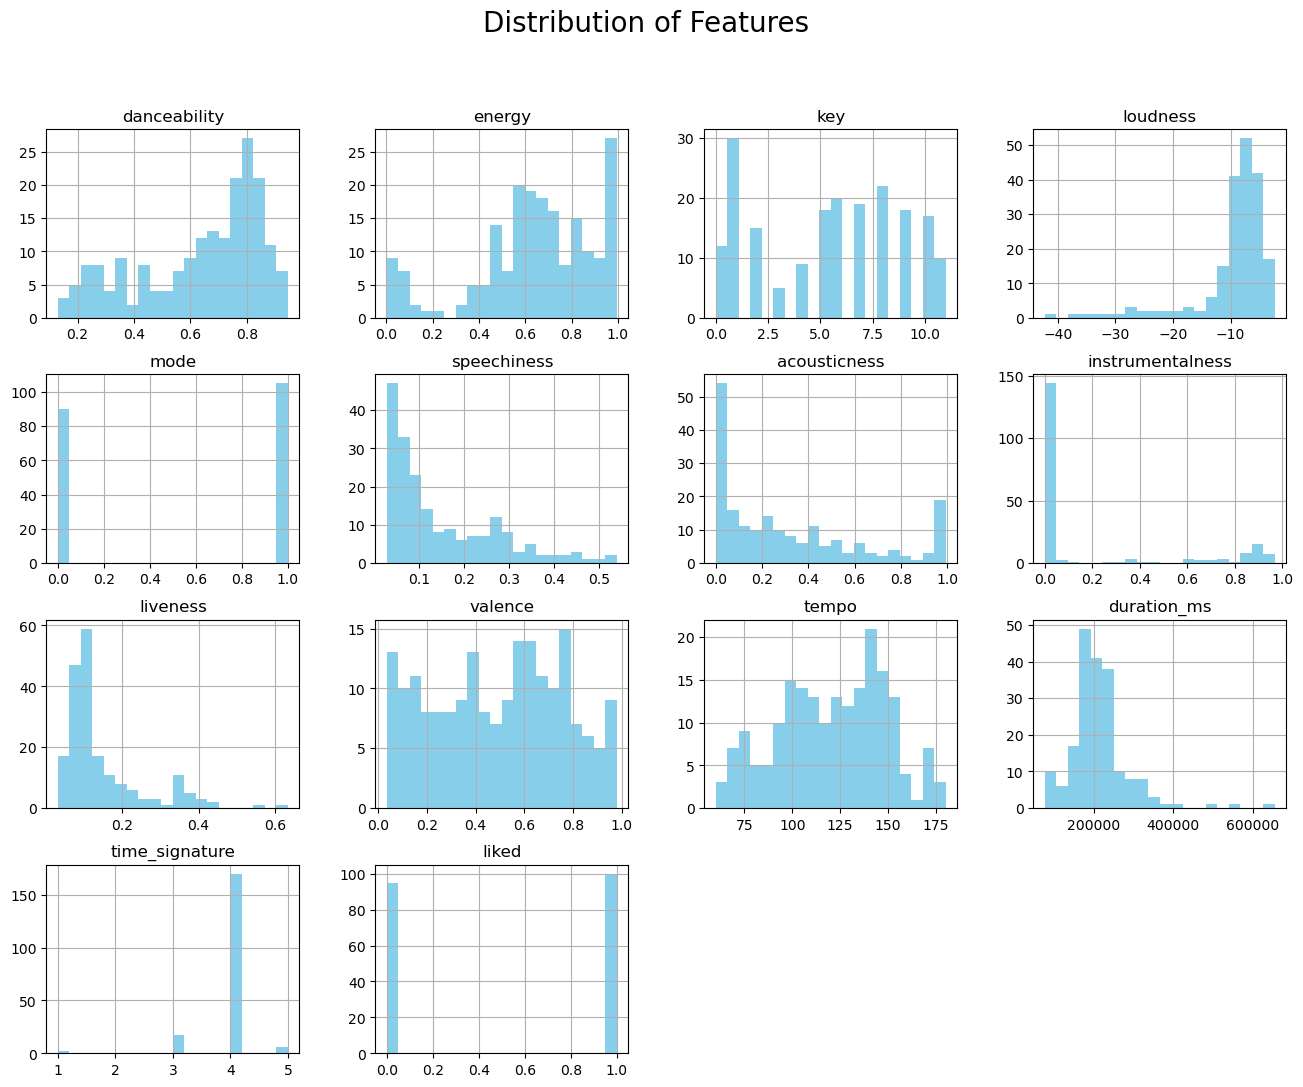

In [11]:
# Plotting histograms for all the features
spotify_data.hist(bins=20, figsize=(16, 12), color='skyblue')
plt.suptitle('Distribution of Features', fontsize=20)
plt.show()

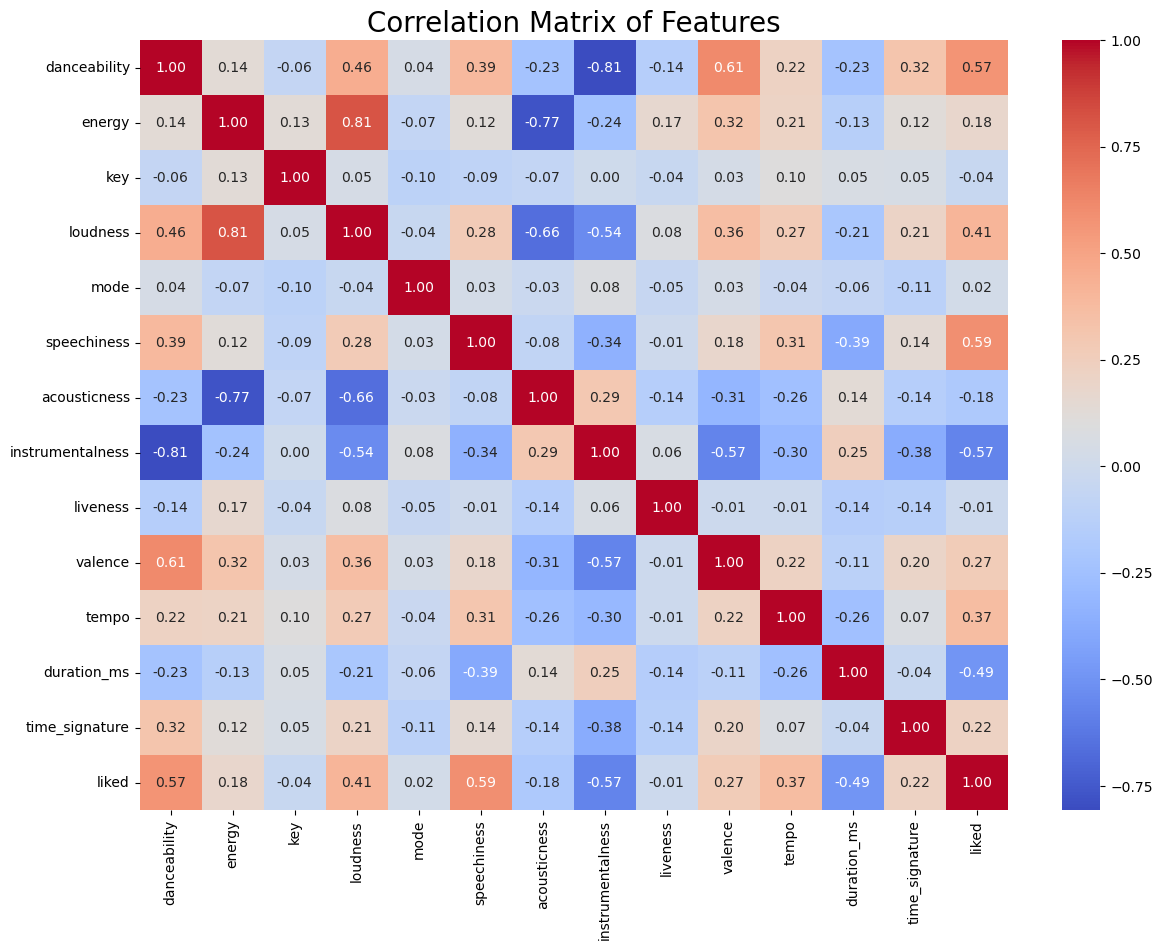

In [12]:
# Correlation matrix
plt.figure(figsize=(14, 10))
correlation_matrix = spotify_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Correlation Matrix of Features', fontsize=20)
plt.show()

In [13]:
# Calculate the absolute correlation with the target variable 'liked'
correlation_with_target = correlation_matrix['liked'].abs().sort_values(ascending=False)

In [14]:
print(correlation_with_target)

liked               1.000000
speechiness         0.591505
instrumentalness    0.569440
danceability        0.569425
duration_ms         0.490651
loudness            0.410774
tempo               0.371202
valence             0.268653
time_signature      0.221479
acousticness        0.179375
energy              0.176179
key                 0.044406
mode                0.023747
liveness            0.009797
Name: liked, dtype: float64


In [15]:
# Define a variance threshold to eliminate features with very low variance
variance_threshold = 0.01
high_variance_features = spotify_data.loc[:, spotify_data.var() > variance_threshold].columns

In [16]:
# Combine correlation and variance thresholds to select features
selected_features = correlation_with_target[correlation_with_target > 0.1].index.intersection(high_variance_features)

### Model Splitting

In [17]:
# Extract selected features and the target variable
X = spotify_data[selected_features.drop('liked')].values
y = spotify_data['liked'].values

In [18]:
# Normalize the features
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_normalized = (X - X_mean) / X_std

In [19]:
# Custom train-test split using NumPy
def train_test_split_custom(X, y, test_size=0.2, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)
    
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    
    test_set_size = int(test_size * X.shape[0])
    test_indices = indices[:test_set_size]
    train_indices = indices[test_set_size:]
    
    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]


In [20]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split_custom(X_normalized, y, test_size=0.2, random_state=42)

### Model Implementation Using Logistic Regression

In [21]:
# Logistic Regression Implementation using only NumPy
n_features = X_train.shape[1]
weights = np.zeros(n_features)
bias = 0.0
learning_rate = 0.01
n_iterations = 1000

In [22]:
# Logistic Regression Implementation using only NumPy
n_features = X_train.shape[1]
weights = np.zeros(n_features)
bias = 0.0
learning_rate = 0.01
n_iterations = 1000

In [23]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Logistic regression model
def logistic_regression(X, weights, bias):
    return sigmoid(np.dot(X, weights) + bias)

# Cost function (log-loss) and its gradient
def compute_cost_and_gradient(X, y, weights, bias):
    m = len(y)
    y_pred = logistic_regression(X, weights, bias)
    
    # Cost function
    cost = -(1/m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    
    # Gradients
    dw = (1/m) * np.dot(X.T, (y_pred - y))
    db = (1/m) * np.sum(y_pred - y)
    
    return cost, dw, db

In [24]:
# Gradient descent optimization
cost_history = []

In [25]:
for i in range(n_iterations):
    cost, dw, db = compute_cost_and_gradient(X_train, y_train, weights, bias)
    weights -= learning_rate * dw
    bias -= learning_rate * db
    cost_history.append(cost)

In [26]:
# Predicting on the test set
y_pred_prob = logistic_regression(X_test, weights, bias)
y_pred = (y_pred_prob >= 0.5).astype(int)

In [27]:
# Custom accuracy, precision, recall, and F1-score calculations
def accuracy_score_custom(y_true, y_pred):
    return np.mean(y_true == y_pred)

def precision_score_custom(y_true, y_pred):
    true_positives = np.sum((y_true == 1) & (y_pred == 1))
    predicted_positives = np.sum(y_pred == 1)
    return true_positives / predicted_positives if predicted_positives > 0 else 0

def recall_score_custom(y_true, y_pred):
    true_positives = np.sum((y_true == 1) & (y_pred == 1))
    actual_positives = np.sum(y_true == 1)
    return true_positives / actual_positives if actual_positives > 0 else 0

def f1_score_custom(y_true, y_pred):
    precision = precision_score_custom(y_true, y_pred)
    recall = recall_score_custom(y_true, y_pred)
    return 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0


In [28]:
# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score_custom(y_test, y_pred)
precision = precision_score_custom(y_test, y_pred)
recall = recall_score_custom(y_test, y_pred)
f1 = f1_score_custom(y_test, y_pred)

In [30]:
# Output final results
print(weights)
print(bias)
print(cost_history[-1])
print(accuracy)
print(precision)
print(recall)
print(f1)

[ 0.97251509 -0.67645296  0.62921125 -0.77763047  0.52007087  0.46159851
  0.01438289  0.22741863 -0.01371547  0.00838157]
-0.08201017220042169
0.2534380442907219
0.8461538461538461
0.85
0.85
0.85


In [31]:
#Accuracy
print(accuracy)

0.8461538461538461


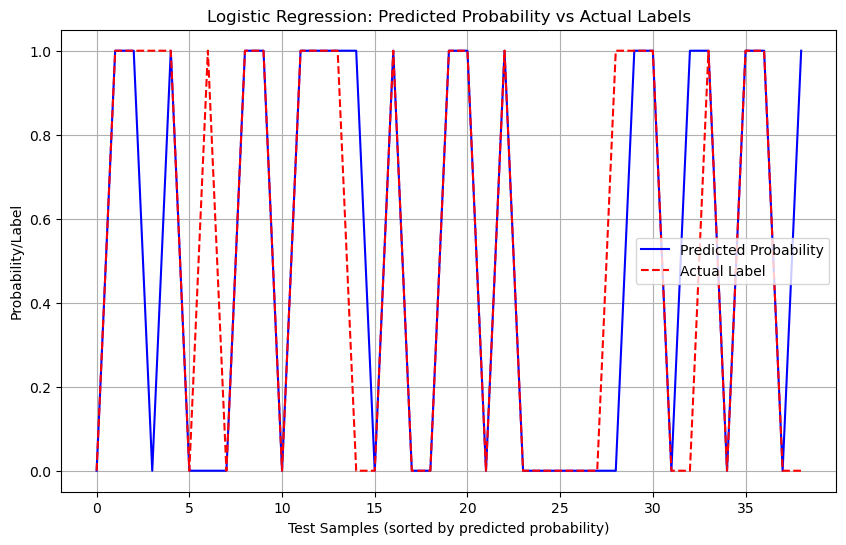

In [33]:
# Plotting the predicted probabilities against the actual labels
plt.figure(figsize=(10, 6))
plt.plot(y_pred, label='Predicted Probability', color='blue')
plt.plot(y_test, label='Actual Label', color='red', linestyle='dashed')
plt.xlabel('Test Samples (sorted by predicted probability)')
plt.ylabel('Probability/Label')
plt.title('Logistic Regression: Predicted Probability vs Actual Labels')
plt.legend()
plt.grid(True)
plt.show()